# Hands-on Session : K-Means Clustering

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
os.chdir("Datasets")

In [3]:
data = pd.read_excel("tripDetails.xlsx")
data.head()

,TripID,TripLength,MaxSpeed,MostFreqSpeed,TripDuration,Brakes,IdlingTime,Honking
0,1,21,51,14,93,307,27,112
1,2,148,130,106,156,226,5,114
2,3,18,38,16,100,351,26,107
3,4,22,43,48,36,17,4,5
4,5,183,108,90,171,88,5,29


In [4]:
data.drop(['TripID'], axis = 1, inplace = True) #not much use
data.head()

,TripLength,MaxSpeed,MostFreqSpeed,TripDuration,Brakes,IdlingTime,Honking
0,21,51,14,93,307,27,112
1,148,130,106,156,226,5,114
2,18,38,16,100,351,26,107
3,22,43,48,36,17,4,5
4,183,108,90,171,88,5,29


In [5]:
features = list(data.columns)

In [6]:
print(features)

['TripLength', 'MaxSpeed', 'MostFreqSpeed', 'TripDuration', 'Brakes', 'IdlingTime', 'Honking']


In [7]:
#adding units for each attribute
units = ['kms', 'kmph', 'kmph', 'mins', 'counts', 'mins', 'counts']
feature_units = dict(zip(features, units))
print(feature_units)

{'TripLength': 'kms', 'MaxSpeed': 'kmph', 'MostFreqSpeed': 'kmph', 'TripDuration': 'mins', 'Brakes': 'counts', 'IdlingTime': 'mins', 'Honking': 'counts'}


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
TripLength       91 non-null int64
MaxSpeed         91 non-null int64
MostFreqSpeed    91 non-null int64
TripDuration     91 non-null int64
Brakes           91 non-null int64
IdlingTime       91 non-null int64
Honking          91 non-null int64
dtypes: int64(7)
memory usage: 5.1 KB


In [9]:
data.describe()

,TripLength,MaxSpeed,MostFreqSpeed,TripDuration,Brakes,IdlingTime,Honking
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,70.769231,70.362637,50.648352,87.373626,135.439560,11.593407,49.923077
std,73.302126,34.509424,34.349632,47.123160,114.758607,9.796800,46.371023
min,16.000000,35.000000,12.000000,22.000000,14.000000,4.000000,4.000000
25%,20.000000,42.000000,15.500000,34.500000,36.500000,5.000000,20.000000
50%,21.000000,54.000000,42.000000,88.000000,100.000000,5.000000,25.000000
75%,163.000000,105.500000,89.000000,133.000000,198.000000,24.000000,97.500000
max,210.000000,138.000000,118.000000,171.000000,429.000000,32.000000,155.000000


Understand spread of variables

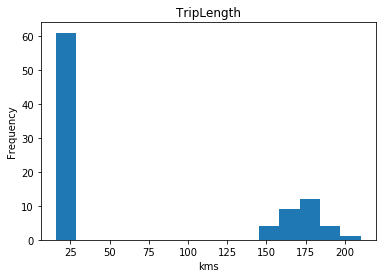

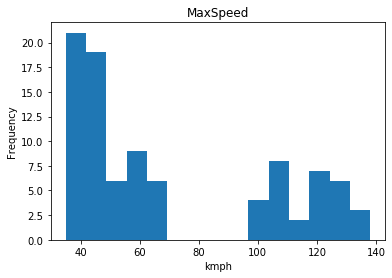

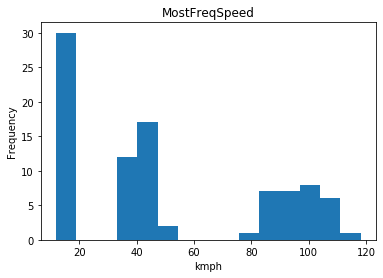

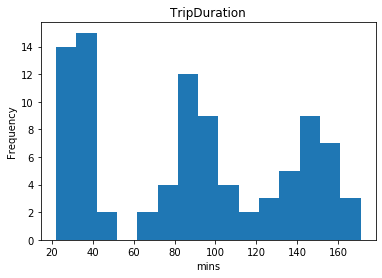

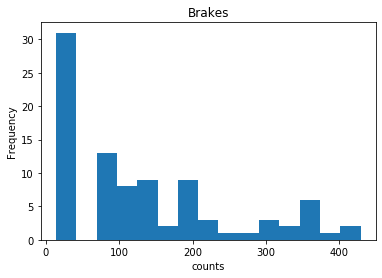

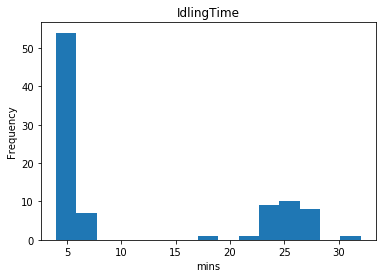

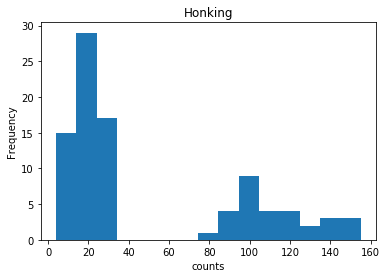

In [10]:
for item in features:
    data[item].plot(kind = 'hist', bins = 15)
    plt.title(item)
    plt.xlabel(feature_units[item])
    plt.show()

Histograms show that data points are clearly segregated into diff. groups

In [11]:
cor = data.corr()
print(cor)

               TripLength  MaxSpeed  MostFreqSpeed  TripDuration    Brakes  \
TripLength       1.000000  0.933549       0.922928      0.842934  0.047158   
MaxSpeed         0.933549  1.000000       0.928592      0.730388  0.011993   
MostFreqSpeed    0.922928  0.928592       1.000000      0.632675 -0.182159   
TripDuration     0.842934  0.730388       0.632675      1.000000  0.416028   
Brakes           0.047158  0.011993      -0.182159      0.416028  1.000000   
IdlingTime      -0.471204 -0.564379      -0.726001      0.018913  0.641201   
Honking          0.429318  0.458151       0.309691      0.571365  0.778774   

               IdlingTime   Honking  
TripLength      -0.471204  0.429318  
MaxSpeed        -0.564379  0.458151  
MostFreqSpeed   -0.726001  0.309691  
TripDuration     0.018913  0.571365  
Brakes           0.641201  0.778774  
IdlingTime       1.000000  0.160450  
Honking          0.160450  1.000000  


Seems like maxspeed, mostfreqspeed, tripduration have a very high correlation with the triplength. idling time has a negative correlation with triplength. Honking and triplength have a medicore correlation

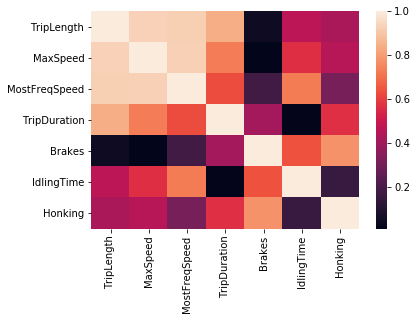

In [12]:
sns.heatmap(np.abs(cor), xticklabels = cor.columns, yticklabels = cor.columns) #Cool plot!
plt.show()

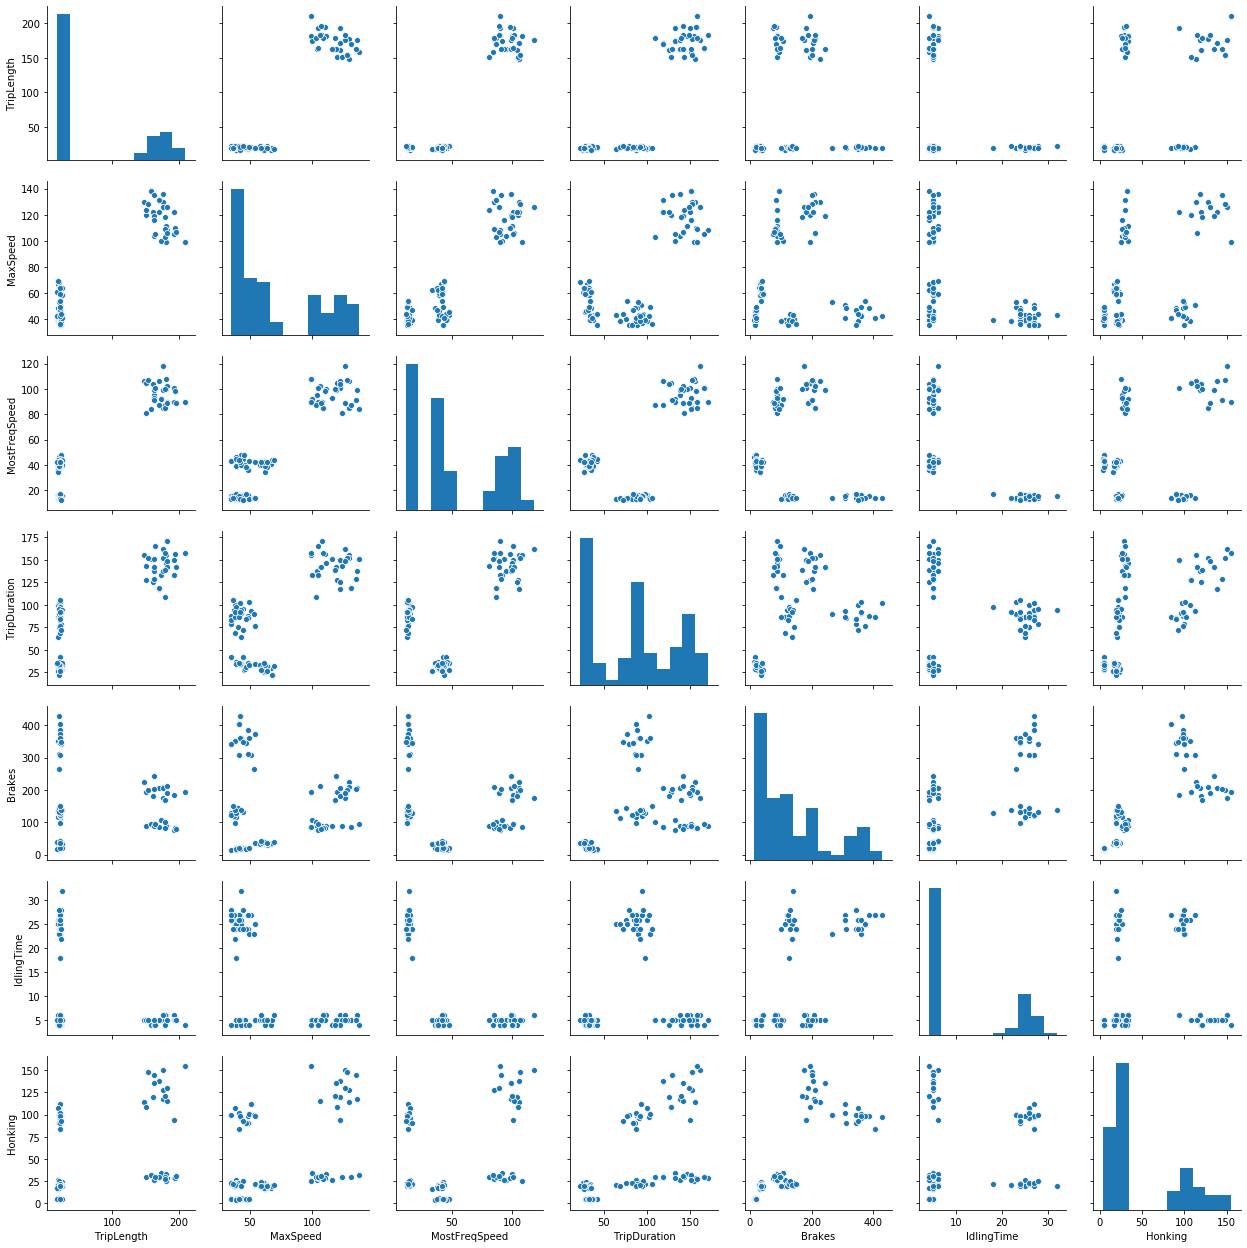

In [13]:
sns.pairplot(data)
plt.show()

We see that few clusters are spherically distd. whereas some are elliptically distd.
Also diff. no. of clusters for different pair of features
Few clusters are compact, some are not
In most of scatterplots, we see that there are 3 candidate clusters, based on compactness and isolation

In [14]:
#Scaling the features

To standardize the data. (standard scaling, [xi - mu /sigma], Gaussian Distribution)

In [16]:
from sklearn.preprocessing import StandardScaler #normalizing the variables
#THIS IS A VERY IMPORTANT STEP, otherwise the units and the values WILL AFFECT THE K-Means ALGORITHM

In [17]:
import copy as cp

In [18]:
data2 = data.copy()

In [19]:
data2 = StandardScaler().fit_transform(data2.values)
data2 = pd.DataFrame(data2, columns = features)

In [20]:
data2.head()

,TripLength,MaxSpeed,MostFreqSpeed,TripDuration,Brakes,IdlingTime,Honking
0,-0.682722,-0.564191,-1.072832,0.120059,1.503250,1.581327,1.346117
1,1.059432,1.737721,1.620347,1.464388,0.793511,-0.676745,1.389487
2,-0.723875,-0.942987,-1.014285,0.269429,1.888788,1.478688,1.237694
3,-0.669004,-0.797296,-0.077527,-1.096239,-1.037794,-0.779385,-0.974142
4,1.539554,1.096682,1.151968,1.784466,-0.415676,-0.676745,-0.453710


In [22]:
data2.describe()

,TripLength,MaxSpeed,MostFreqSpeed,TripDuration,Brakes,IdlingTime,Honking
count,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01
mean,-6.832142e-17,1.409129e-16,-4.392091e-17,-1.244426e-16,4.392091e-17,1.000421e-16,7.564157e-17
std,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00
min,-7.513106e-01,-1.030401e+00,-1.131380e+00,-1.394979e+00,-1.064080e+00,-7.793847e-01,-9.958266e-01
25%,-6.964396e-01,-8.264343e-01,-1.028922e+00,-1.128247e+00,-8.669302e-01,-6.767450e-01,-6.488720e-01
50%,-6.827218e-01,-4.767767e-01,-2.531691e-01,1.336591e-02,-3.105292e-01,-6.767450e-01,-5.404486e-01
75%,1.265199e+00,1.023837e+00,1.122694e+00,9.736010e-01,5.481684e-01,1.273409e+00,1.031690e+00
max,1.909933e+00,1.970826e+00,1.971631e+00,1.784466e+00,2.572241e+00,2.094526e+00,2.278558e+00


In [23]:
from sklearn import cluster

In [24]:
#Clue to determine no. of Clusters: Cluster the data with K-Means for different vals. of K
#Elbow Method - Looks at % of variance as a function of no. of clusters
#Point where marginal decrease plateaus is an indicator of the no. of clusters that are optimal

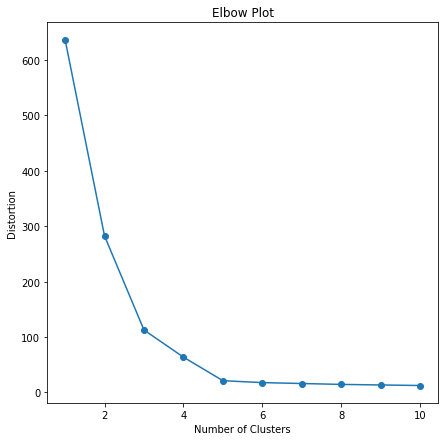

In [25]:
distortions = [] #WCSS (Within Cluster Sum of Squares storage)

for i in range(1, 11):
    km = cluster.KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 100)
    km.fit(data2.values)
    distortions.append(km.inertia_)
#K-means++ : Optimal cluster centroids, and doesn't random pick  

#Plotting the K-means Elbow Plot
#n_init: 10 times pick i cluster centroids, then pick the optimal one
#random_state = 100, the same set of samples will be chosen next time also, to reproduce output.
#inertia is just WCSS value of the K-means model

plt.figure(figsize = (7, 7))
plt.plot(range(1, 11), distortions, marker = 'o')
plt.title("Elbow Plot")
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

Marginal Decrease plateaus at point (3,110)
After that the decrease isn't that drastic (and it might be the result of overfitting)

In [37]:
k = 3
km3 = cluster.KMeans(n_clusters = k, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 100)
km3.fit(data2.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [28]:
labels = km3.labels_   #3 clusters means labels are 0, 1 and 2.
Ccentres = km3.cluster_centers_
data2['labels'] = labels
data2['labels'] = data2['labels'].astype('str')
print(data2['labels'])

0     2
1     1
2     2
3     0
4     1
     ..
86    2
87    1
88    2
89    1
90    0
Name: labels, Length: 91, dtype: object


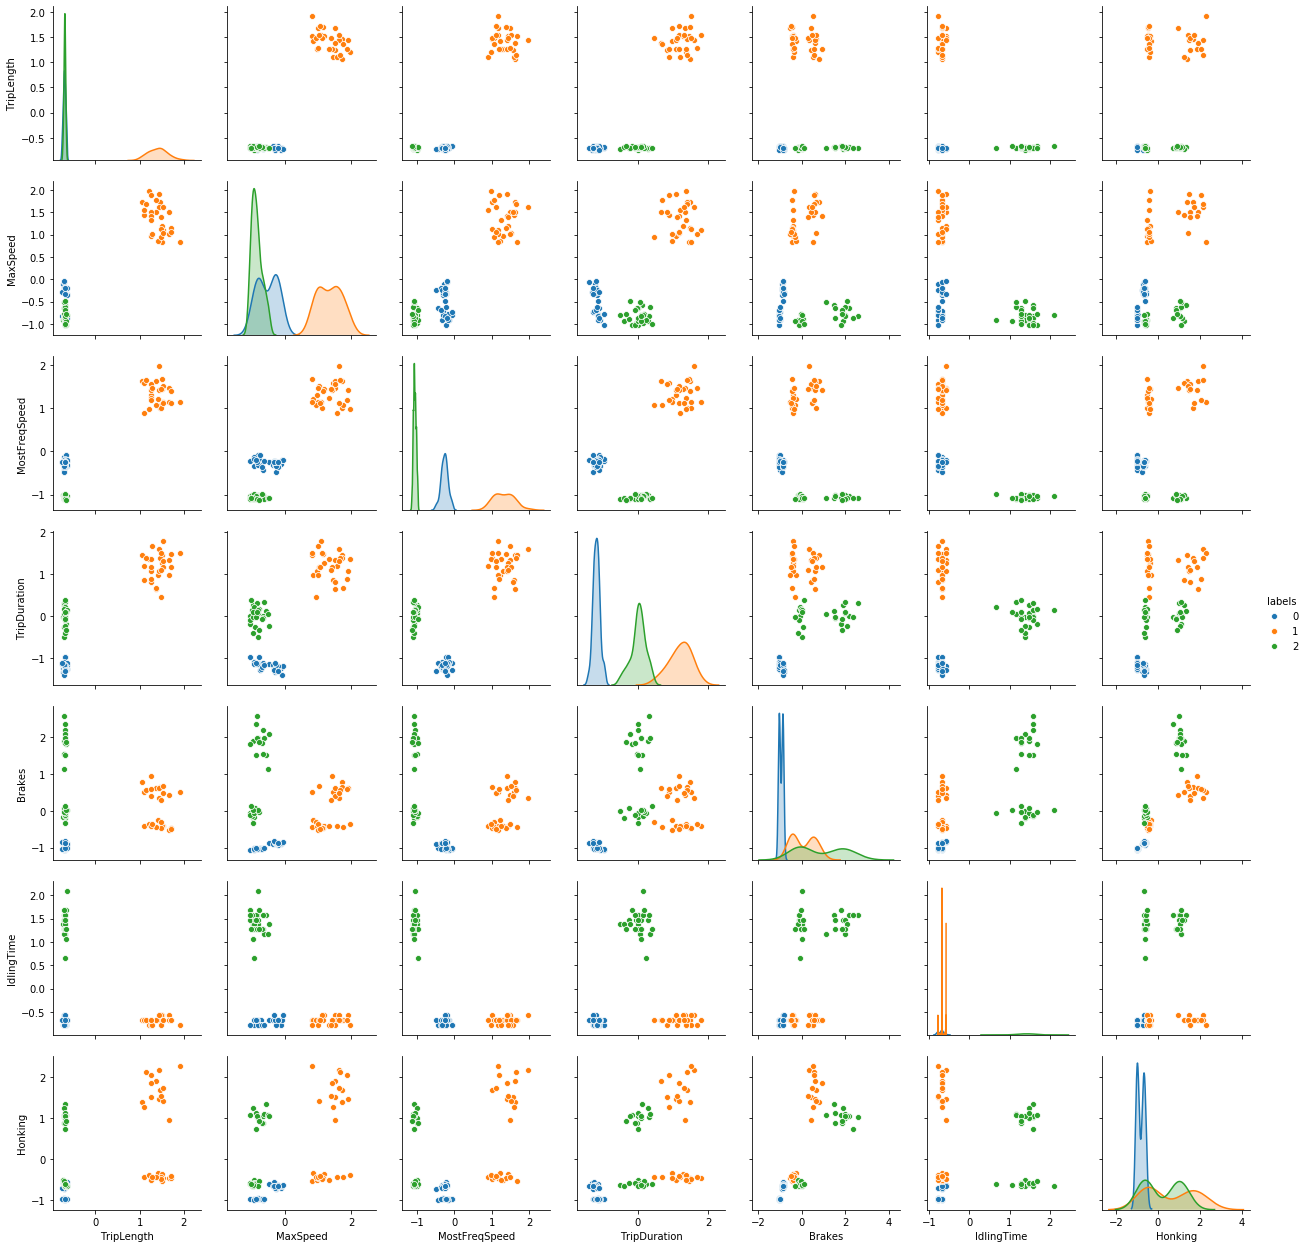

In [29]:
sns.pairplot(data2, x_vars = features, y_vars = features, hue = 'labels', diag_kind = 'kde')
plt.show()

In [32]:
#Verifying correctness of Clustering
#We use mean() of each cluster to verify
#Check if mean differs for each cluster


c_df = pd.concat([data[data2.labels == '0'].mean(), 
                 data[data2.labels == '1'].mean(), 
                 data[data2.labels == '2'].mean()], axis = 1)
c_df.columns = ['cluster1', 'cluster2', 'cluster3']
c_df

,cluster1,cluster2,cluster3
TripLength,19.838710,174.000000,20.166667
MaxSpeed,52.806452,116.966667,41.900000
MostFreqSpeed,41.677419,96.066667,14.500000
TripDuration,32.129032,143.800000,88.033333
Brakes,27.161290,143.866667,238.900000
IdlingTime,4.709677,4.966667,25.333333
Honking,12.516129,78.633333,59.866667


In [33]:
#cluster 1 : intercity driving during peak hours, due to low trip duration, low max speed, low trip length
#cluster 2 : highway trips, due to high trip duration and low idling time
#cluster 3 : intercity driving during non-peak hours, due to low trip length, low max speed, higher idling time

#DOUBT: seems like Cluster1 is Non-Peak Hours, and Cluster3 is Peak Hours, based on the observations. Need to Check.

In [34]:
triptype = ['Intercity-Peak Hours', 'Highway', 'Intercity-Non-Peak Hours']
data['labels'] = labels #Using the labelling obtained from the KMeans Model
data['labels'] = data['labels'].map({0:triptype[0], 1:triptype[1], 2:triptype[2]}) #Changing 0, 1, 2 to English info. 
                                                                                    #using map()

In [35]:
print(data.head())

   TripLength  MaxSpeed  MostFreqSpeed  TripDuration  Brakes  IdlingTime  \
0          21        51             14            93     307          27   
1         148       130            106           156     226           5   
2          18        38             16           100     351          26   
3          22        43             48            36      17           4   
4         183       108             90           171      88           5   

   Honking                    labels  
0      112  Intercity-Non-Peak Hours  
1      114                   Highway  
2      107  Intercity-Non-Peak Hours  
3        5      Intercity-Peak Hours  
4       29                   Highway  
